In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from functions.match_functions import *
from functions.preprocess_functions import *
import seaborn as sns


[17:06:17] WARNING: not removing hydrogen atom without neighbors
[17:06:17] WARNING: not removing hydrogen atom without neighbors
[17:06:17] WARNING: not removing hydrogen atom without neighbors


# Import files 
Change paths for csv file (save from "Rest_api_metaboscape.ipynb") and targets


In [16]:
df_restapi=pd.read_csv("unprocessed_data/all_wells_20250411.csv",index_col=0)
values_df=pd.read_csv("first_plate/first_plate_targets.csv", sep=";")
df_restapi.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY',
      'CHARGE', 'RT', 'peaks', 'Well']

df_restapi

/tmp/ipykernel_5041/1204678500.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  values_df=pd.read_csv("first_plate/first_plate_targets.csv", sep=";")


,CCS,Precursor_type,PrecursorMZ,POLARITY,CHARGE,RT,peaks,Well
0,124.171295,[M+H]+,136.061711,Pos,+,4.637133,"{'mz': [61.01280583371198, 65.23473240305354, ...",A10
1,145.152512,[M+H]+,202.179960,Pos,+,10.133312,"{'mz': [62.059756823333565, 84.08136805823057,...",A10
2,233.117508,[M+H+H]2+,139.013036,Pos,2+,10.827045,"{'mz': [105.50619815568453, 108.66883452540216...",A10
3,139.079559,[M+H]+,217.014323,Pos,+,11.148840,"{'mz': [60.98732931781918, 61.0102815668719, 6...",A10
4,171.973175,[M+H]+,372.970212,Pos,+,11.468700,"{'mz': [79.02245327374462, 136.9709713703652, ...",A10
...,...,...,...,...,...,...,...,...
718,246.280075,[M+H]+,552.484355,Pos,+,291.391418,"{'mz': [56.593172715075696, 57.96481976770686,...",P09
719,127.036064,[M+H]+,176.975790,Pos,+,297.084778,"{'mz': [57.934495233316554, 138.93616861403277...",P09
720,144.092514,[M+H]+,225.010404,Pos,+,296.678467,"{'mz': [79.0229018888081, 87.98329855437615, 1...",P09
721,154.433304,[M+H]+,254.925795,Pos,+,300.553375,"{'mz': [176.9091901553379], 'intensity': [94.5...",P09


In [9]:
def plot_match_and_error(df, well,ppm, values_df):
    fig,ax=plt.subplots(1,2,figsize=(12, 5))
    
    match,not_found,i_match,i_not_found,data_out=match_one_well(df,well,ppm,values_df,True)
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[0].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[0].legend()
    ax[0].set_title( str(len(match)) +" matches")
    ax[0].set_xlabel("Target M")
    
    data=data_out.dropna(subset="Target")
    ax[1].scatter(data["Target"],data["M"]-data["Target"])
    ax[1].set_ylabel("Diff in Da")
    ax[1].set_xlabel("Target M")
    ax[1].set_title("Diff at "+str(ppm)+"ppm")
    ax[1].axhline(y=0, color='r', linestyle='-')

# Loop through all wells and match them
Saves all matched and unmatched from targets and standards for plotting

In [19]:
match_all=[]
ppm=5
not_found_all=[]
i_match_all=[]
i_not_found_all=[]
data_combined=pd.DataFrame(columns=df_restapi.columns)
t=0
for well in df_restapi["Well"].unique():
    match,not_found,i_match,i_not_found,data_out=match_one_well(df_restapi,well,ppm,values_df,int_s=True)
    for m in match:
        match_all.append(m)
    for n in not_found:
        not_found_all.append(n)
    for im in i_match:
        i_match_all.append(im)
    for i in i_not_found:
        i_not_found_all.append(i)
        
    t=t+len(values_df[values_df["Position"]==well])
    data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target")#.iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")
data_filtered.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY', 'CHARGE', 'RT',
       'peaks', 'Well', 'M', 'Target', 'SMILES', 'InChIKey', 'Name']

#data_filtered.to_csv("plate20250408_matched_"+str(ppm)+"ppm.csv")

----- Targeting A10
Converting m/z to m for matching
Found 71 / 96 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A11
Converting m/z to m for matching


/tmp/ipykernel_5041/1110732684.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 69 / 98 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 1 / 4 matches at 5 ppm
----- Targeting A12
Converting m/z to m for matching
Found 70 / 92 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A13
Converting m/z to m for matching
Found 68 / 94 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A14
Converting m/z to m for matching
Found 70 / 94 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 3 / 4 matches at 5 ppm
----- Targeting A15
Converting m/z to m for matching
Found 67 / 95 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A16
Converting m/z to m for matching
Found 62 / 95 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A17
Converting m/z to m for matching
Found 67 / 94 ma

## Plot error from target

26119

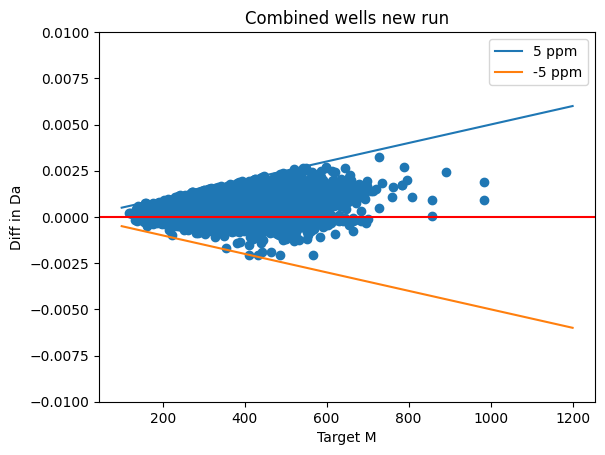

In [20]:
data=data_filtered
x=np.linspace(100,1200)
y=x*ppm*10**-6
plt.scatter(data["Target"],data["M"]-data["Target"])
plt.ylabel("Diff in Da")
plt.xlabel("Target M")
plt.ylim(-0.01,0.01)
plt.title("Combined wells new run")
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(x,y,label=str(ppm)+" ppm")
plt.plot(x,-y,label="-"+str(ppm)+" ppm")
plt.legend()
len(data)

## Histogram over matches

(50.0, 800.0)

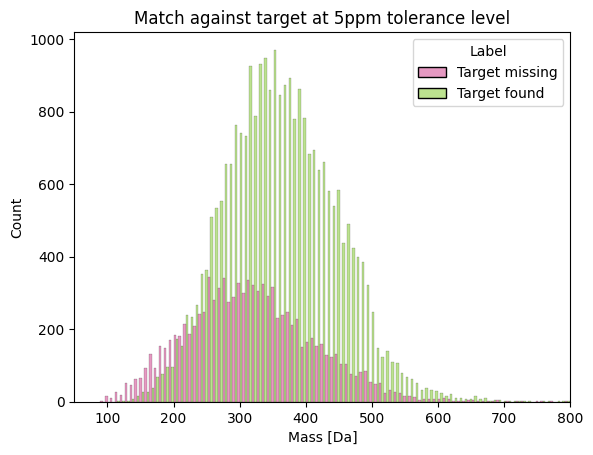

In [21]:
t=pd.DataFrame(match_all)
t["label"]="Target found"
n=pd.DataFrame(not_found_all)
n["label"]="Target missing"

s=pd.concat([n,t])
s.columns=["Mass [Da]","Label"]
fig=sns.histplot(data=s, x="Mass [Da]",hue="Label",multiple="dodge",palette=["#de77ae","#a6d96a"])
fig.set_title("Match against target at 5ppm tolerance level")
fig.set_xlim(50,800)

## Histogram over standards

(50.0, 800.0)

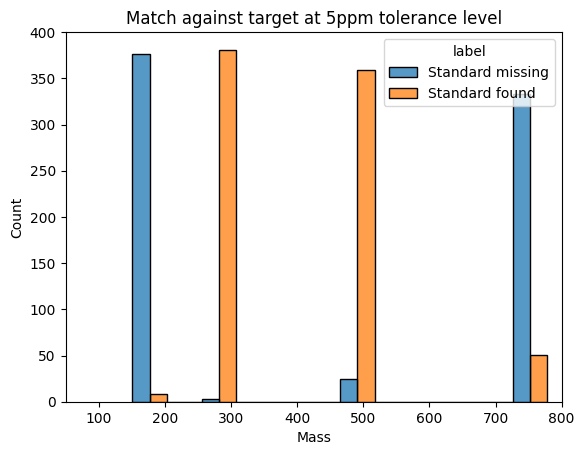

In [22]:
t=pd.DataFrame(i_match_all)
t["label"]="Standard found"
n=pd.DataFrame(i_not_found_all)
n["label"]="Standard missing"

s=pd.concat([n,t])
s.columns=["Mass","label"]
fig=sns.histplot(data=s, x="Mass",hue="label",multiple="dodge")
fig.set_title("Match against target at 5ppm tolerance level")
fig.set_xlim(50,800)

# Alternative, quick matching

! python target_match.py -i "unprocessed_data/all_wells_20250411.csv" -o "test" -t "first_plate/first_plate_targets.csv"

# Preparation for Fiora
This could only done if fiora is installed!

## Filter data

Removes peaks of too low intesitiy, MS/MS with too few peaks etc.
See "filter_data.py" for more info, and to change parameters

In [32]:
!python filter_data.py -i "plate20250408_matched_5ppm.csv" -o "plate20250408_5ppm_preprocessed_rounded_3dec.csv"

Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
/home/michaelah/miniconda3/envs/fiora/lib/python3.10/site-packages/torch/__config__.py:10: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._show_config()
^C
Traceback (most recent call last):
  File "/media/stordisk/Documents/Tims_Tof_data/MetaboScape/filter_data.py", line 28, in <module>
    from functions.preprocess_functions import *
  File "/media/stordisk/Documents/Tims_Tof_data/MetaboScape/functions/preprocess_functions.py", line 12, in <module>
    from fiora.MOL.Metabolite import Metabolite
  File "/home/michaelah/miniconda3/envs/fiora/lib/python3.10/site-packages/fiora/MOL/Metabolite.py", line 11, in <module

## Run training of model

Change path based on location of "train_model.py"

In [25]:

!python ../../'MS models'/fiora/notebooks/train_model.py -i ../../'MS models'/fiora/notebooks/plate20250408_5ppm_preprocessed_rounded_3dec.csv -l 0.001 -e 50 -t "RGCNConv_1" #-m ../../checkpoint_Mona_only.best.pt

[08:51:54] WARNING: not removing hydrogen atom without neighbors
[08:51:54] WARNING: not removing hydrogen atom without neighbors
[08:51:54] WARNING: not removing hydrogen atom without neighbors
/home/michaelah/miniconda3/envs/fiora/lib/python3.10/site-packages/torch/__config__.py:10: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._show_config()
Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
Filtering based on CE and weight
    > Found 7286 unique molecular structures.
Filtering spectra with (7327-7327)
7327
Filtering low peak counts
Removed  1556 due to less than 2 peaks
5771
Split into training, testing and validation
Running on device: cpu
Training model
data

# Comparison to MetaboScape combined run (manual)

In [26]:
df_manual=pd.read_csv("new_run/A01-C24_50/A01-C24.msmsonly.csv")
df_manual=process_col_names(df_manual,2000)

#### Special as 3 A01 (blanks) were present"
cols=list(range(1,74))
cols.remove(12)
cols.remove(13)
df_manual=df_manual.iloc[:,cols]
############

df_manual=add_id(df_manual)

Number of mz found in just one sample:  10119


In [27]:
# To compare with old 

data_combined=pd.DataFrame(columns=df_manual.columns)
t=0
for well in df_manual["Well"].unique():
        
        data_out=match_one_well(df_manual,well,ppm,values_df)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target").iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")

----- Targeting B21
Found 35 / 95 matches at 5 ppm
----- Targeting A24
Found 42 / 91 matches at 5 ppm
----- Targeting B11
Found 47 / 94 matches at 5 ppm
----- Targeting B12


/tmp/ipykernel_5041/2186742671.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 37 / 97 matches at 5 ppm
----- Targeting B03
Found 3 / 89 matches at 5 ppm
----- Targeting B10
Found 4 / 92 matches at 5 ppm
----- Targeting B18
Found 5 / 98 matches at 5 ppm
----- Targeting A09
Found 8 / 90 matches at 5 ppm
----- Targeting A16
Found 9 / 95 matches at 5 ppm
----- Targeting C08
Found 7 / 90 matches at 5 ppm
----- Targeting B02
Found 8 / 98 matches at 5 ppm
----- Targeting C10
Found 35 / 92 matches at 5 ppm
----- Targeting B16
Found 13 / 95 matches at 5 ppm
----- Targeting B22
Found 3 / 92 matches at 5 ppm
----- Targeting A05
Found 41 / 96 matches at 5 ppm
----- Targeting A14
Found 36 / 94 matches at 5 ppm
----- Targeting B20
Found 10 / 96 matches at 5 ppm
----- Targeting B08
Found 40 / 94 matches at 5 ppm
----- Targeting C03
Found 26 / 89 matches at 5 ppm
----- Targeting A23
Found 36 / 93 matches at 5 ppm
----- Targeting A19
Found 38 / 98 matches at 5 ppm
----- Targeting B01
Found 13 / 93 matches at 5 ppm
----- Targeting C02
Found 4 / 93 matches at 5 ppm
----- Tar

In [28]:
# Plot difference between manual run (combined run) and with restapi (separate runs)

----- Targeting A14
Found 38 / 94 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A14
Converting m/z to m for matching
Found 71 / 94 matches at 10 ppm
Internal Standard
Converting m/z to m for matching
Found 3 / 4 matches at 10 ppm


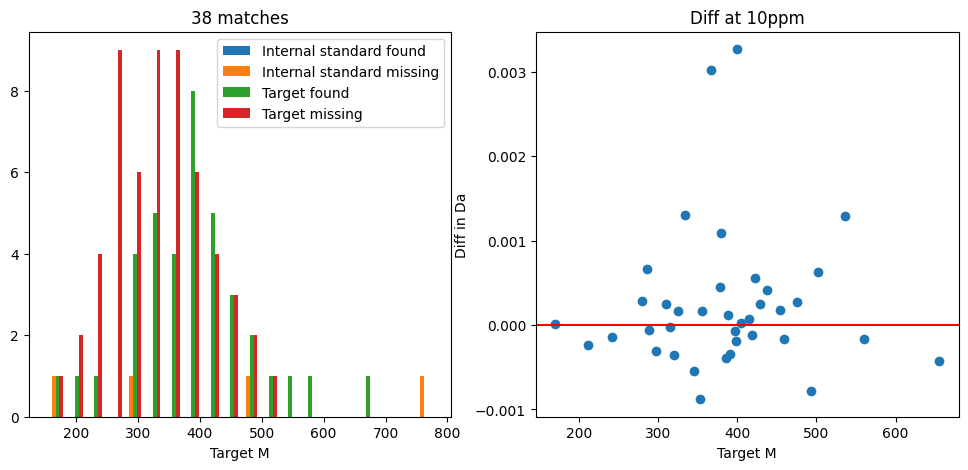

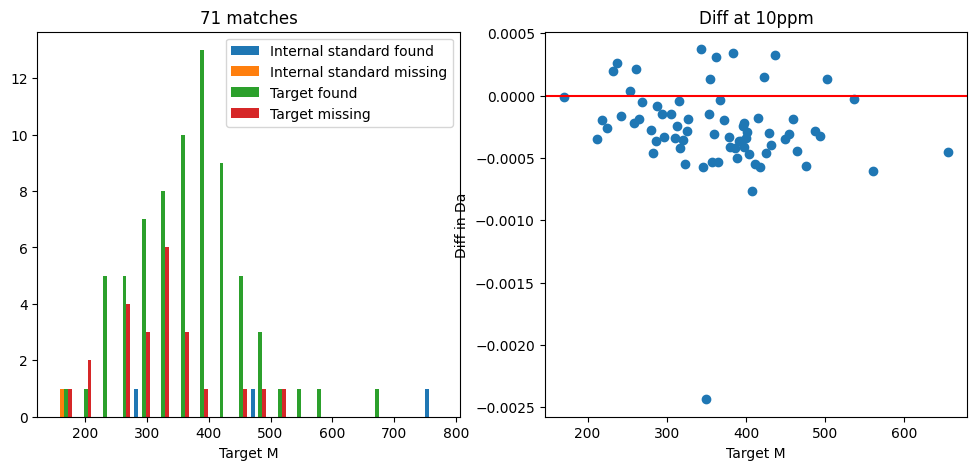

In [29]:
well="A14"
ppm=10
plot_match_and_error(df_manual,well,ppm, values_df)
plot_match_and_error(df_restapi,well,ppm,values_df)